In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Dataset_2023_Final.xlsx"

xlsx = pd.ExcelFile(file_path)
sheet_names = xlsx.sheet_names

df = pd.concat(
    [xlsx.parse(sheet).assign(month=sheet) for sheet in sheet_names],
    ignore_index=True
)

print(df.shape)

(1499567, 15)


In [9]:
df.head()

,slno,modelDesc,fuel,colour,vehicleClass,makeYear,seatCapacity,secondVehicle,tempRegistrationNumber,category,makerName,OfficeCd,fromdate,todate,month
0,1,ACTIVA - 6G DLX BSVI,PETROL,DECENT BLUE METALLIC,MOTOR CYCLE,2022-08-01 00:00:00,2,Y,TS11AGTR3069,Private,HONDA MOTORCYCLE&SCOOTER(I)P L,RTA MEDCHAL,2023-01-01,2023-01-02,Jan-23
1,2,ACTIVA - 6G DLX BSVI,PETROL,DECENT BLUE METALLIC,MOTOR CYCLE,2022-09-01 00:00:00,2,Y,TS11AGTR3340,Private,HONDA MOTORCYCLE&SCOOTER(I)P L,RTA MEDCHAL,2023-01-01,2023-01-02,Jan-23
2,3,ACTIVA - 6G DLX BSVI,PETROL,DECENT BLUE METALLIC,MOTOR CYCLE,2022-10-01 00:00:00,2,N,TS11AGTR3027,Private,HONDA MOTORCYCLE&SCOOTER(I)P L,RTA MEDCHAL,2023-01-01,2023-01-02,Jan-23
3,4,ACTIVA - 6G DLX BSVI,PETROL,DECENT BLUE METALLIC,MOTOR CYCLE,2022-10-01 00:00:00,2,N,TS11AGTR3072,Private,HONDA MOTORCYCLE&SCOOTER(I)P L,RTA MEDCHAL,2023-01-01,2023-01-02,Jan-23
4,5,ACTIVA - 6G DLX BSVI,PETROL,DECENT BLUE METALLIC,MOTOR CYCLE,2022-11-01 00:00:00,2,N,TS11AGTR4864,Private,HONDA MOTORCYCLE&SCOOTER(I)P L,RTA-HYDERABAD-CZ,2023-01-01,2023-01-02,Jan-23


In [11]:
df.dtypes

slno                               int64
modelDesc                         object
fuel                              object
colour                            object
vehicleClass                      object
makeYear                          object
seatCapacity                       int64
secondVehicle                     object
tempRegistrationNumber            object
category                          object
makerName                         object
OfficeCd                          object
fromdate                  datetime64[ns]
todate                    datetime64[ns]
month                             object
dtype: object

In [12]:
df.isnull().sum()

slno                      0
modelDesc                 0
fuel                      0
colour                    8
vehicleClass              0
makeYear                  0
seatCapacity              0
secondVehicle             0
tempRegistrationNumber    0
category                  0
makerName                 0
OfficeCd                  0
fromdate                  0
todate                    0
month                     0
dtype: int64

In [13]:
df['colour'].fillna("Others", inplace=True)

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_14776\3300771559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['colour'].fillna("Others", inplace=True)


In [14]:
df.isnull().sum()

slno                      0
modelDesc                 0
fuel                      0
colour                    0
vehicleClass              0
makeYear                  0
seatCapacity              0
secondVehicle             0
tempRegistrationNumber    0
category                  0
makerName                 0
OfficeCd                  0
fromdate                  0
todate                    0
month                     0
dtype: int64

In [15]:
df.nunique()

slno                      159210
modelDesc                   6187
fuel                          10
colour                     10576
vehicleClass                  32
makeYear                      61
seatCapacity                  57
secondVehicle                  2
tempRegistrationNumber    943684
category                       2
makerName                    567
OfficeCd                      57
fromdate                     352
todate                       352
month                         12
dtype: int64

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 24))

<Figure size 1600x2400 with 0 Axes>

<Figure size 1600x2400 with 0 Axes>

In [10]:
import calendar

month_order = ['Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23', 'Jun-23',
               'July-23', 'Aug-23', 'Sept-23', 'Oct-23', 'Nov-23', 'Dec-23']

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

## Monthly vehicle registration count

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_14776\307916861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_reg.index, y=monthly_reg.values, palette='viridis')


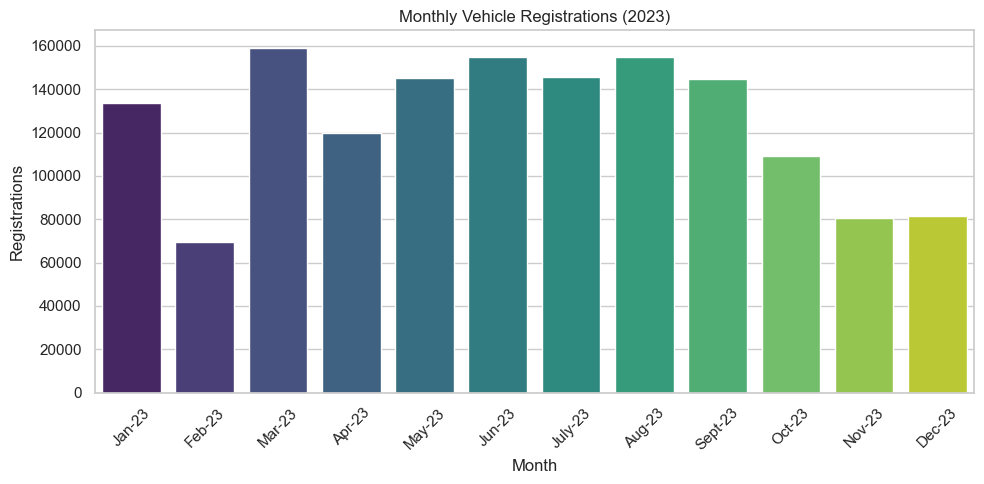

In [20]:
monthly_reg =df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_reg.index, y=monthly_reg.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Monthly Vehicle Registrations (2023)')
plt.xlabel('Month')
plt.ylabel('Registrations')
plt.tight_layout()
plt.show()

## Fuel preference trends over months

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_14776\2142759051.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_trend =df.groupby(['month', 'fuel']).size().unstack().fillna(0)


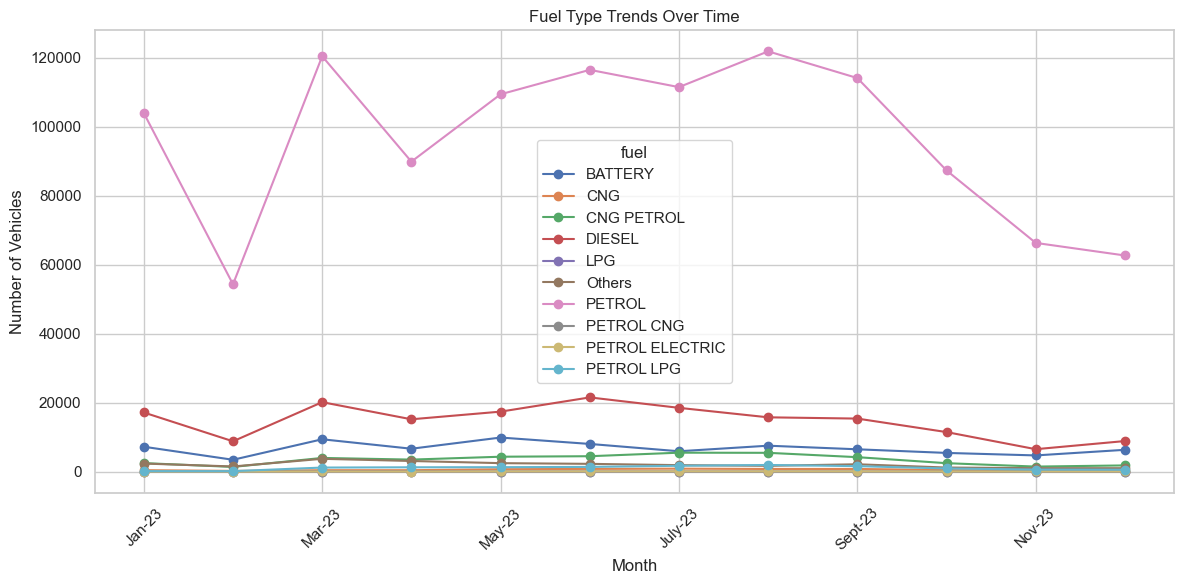

In [21]:
fuel_trend =df.groupby(['month', 'fuel']).size().unstack().fillna(0)
fuel_trend.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Fuel Type Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Category-wise vehicle registration (Commercial vs Private)

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_14776\2189552001.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_trend = df.groupby(['month', 'category']).size().unstack().fillna(0)


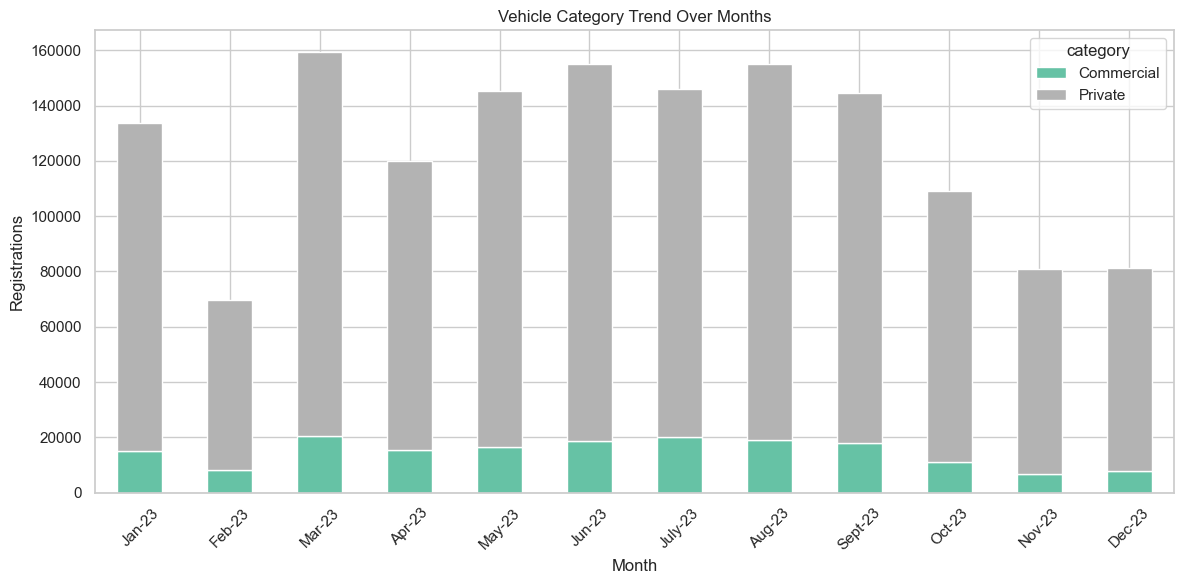

In [23]:
category_trend = df.groupby(['month', 'category']).size().unstack().fillna(0)
category_trend.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Vehicle Category Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 vehicle models of 2023

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_14776\1587259129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_models.index, x=top_models.values, palette='magma')


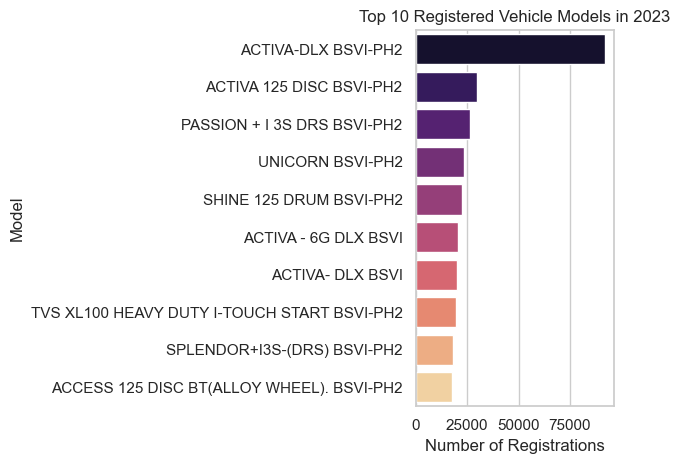

In [24]:
top_models = df['modelDesc'].value_counts().nlargest(10)
sns.barplot(y=top_models.index, x=top_models.values, palette='magma')
plt.title('Top 10 Registered Vehicle Models in 2023')
plt.xlabel('Number of Registrations')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

## Electric Vehicle (EV) trend detection

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_14776\1318198188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_trend['month'] = pd.Categorical(ev_trend['month'], categories=month_order, ordered=True)


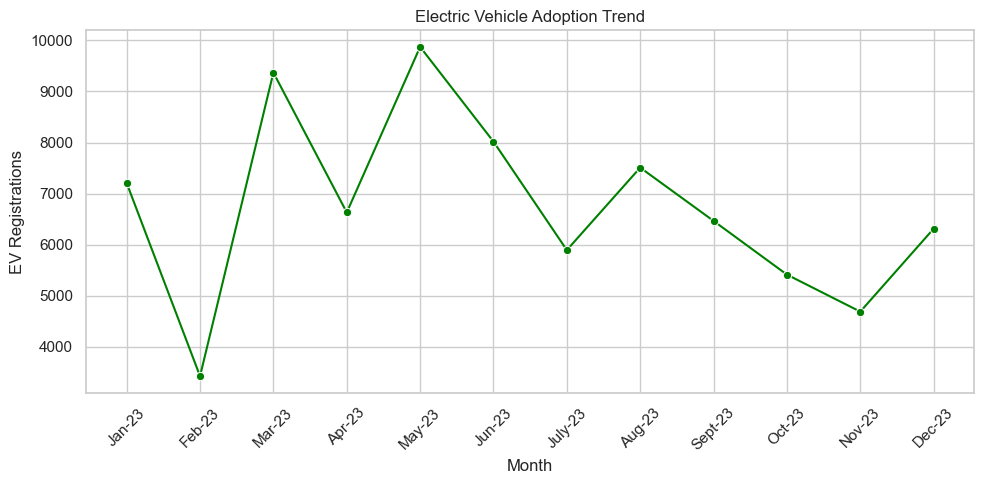

In [29]:
ev_trend = df[df['fuel'].str.contains('battery', case=False, na=False)]
ev_trend['month'] = pd.Categorical(ev_trend['month'], categories=month_order, ordered=True)
ev_monthly = ev_trend['month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=ev_monthly.index, y=ev_monthly.values, marker='o', color='green')
plt.title('Electric Vehicle Adoption Trend')
plt.xlabel('Month')
plt.ylabel('EV Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Fuel Type Distribution

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_14776\1496112423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=fuel_counts.values, y=fuel_counts.index, palette="pastel")


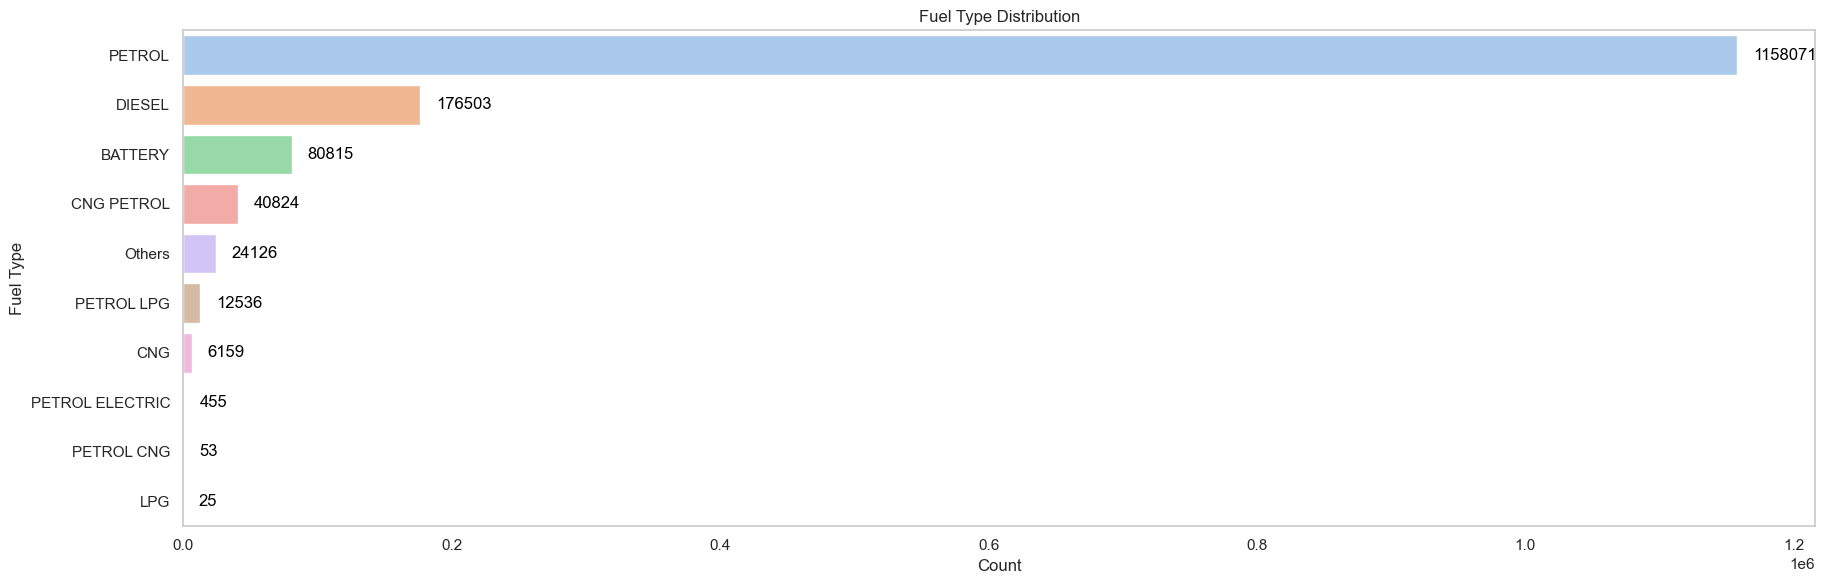

In [81]:
fuel_counts = df['fuel'].dropna().value_counts()
plt.figure(figsize=(18.5,6))
ax = sns.barplot(x=fuel_counts.values, y=fuel_counts.index, palette="pastel")
plt.title("Fuel Type Distribution")
plt.xlabel("Count")
plt.ylabel("Fuel Type")
for i, v in enumerate(fuel_counts.values):
    ax.text(v + max(fuel_counts.values)*0.01, i, str(v), color='black', va='center')
plt.tight_layout()
plt.grid(False)
plt.show()

## Top 10 Seating Capacity by Vehicle Count

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_14776\2654759671.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_seats.index.astype(str), y=top_seats.values, palette='plasma')  # convert index to str!


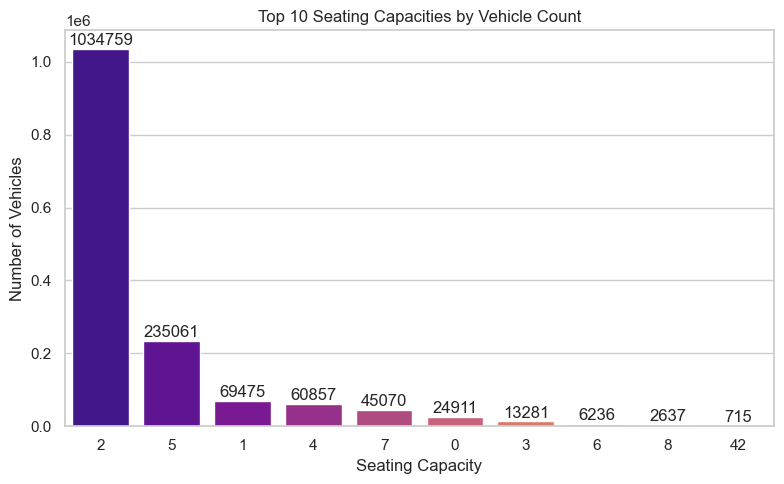

In [95]:
df['seatCapacity'] = pd.to_numeric(df['seatCapacity'], errors='coerce')
top_seats = df['seatCapacity'].value_counts().dropna().nlargest(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_seats.index.astype(str), y=top_seats.values, palette='plasma')  # convert index to str!
plt.title('Top 10 Seating Capacities by Vehicle Count')
plt.xlabel('Seating Capacity')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=0)
for i, v in enumerate(top_seats.values):
    plt.text(i, v + max(top_seats.values)*0.01, str(v), ha='center')

plt.tight_layout()
plt.show()

## Top 5 Vehicle Classes

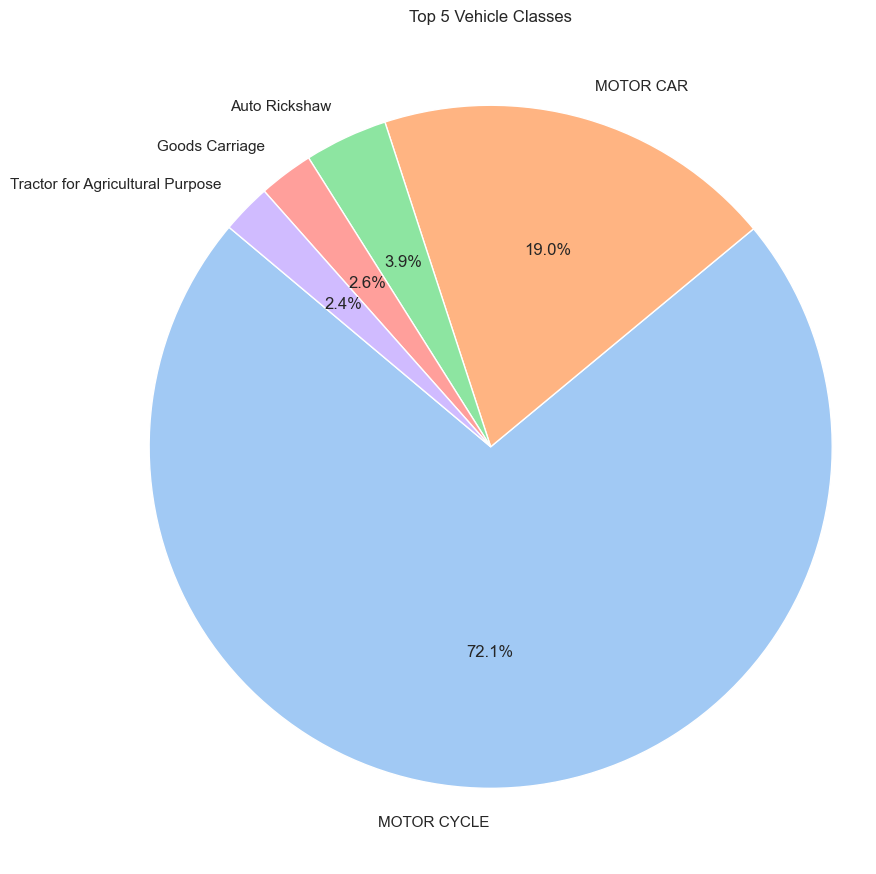

In [46]:
top_classes = df['vehicleClass'].value_counts().nlargest(5)
plt.figure(figsize=(9,9))
plt.pie(top_classes.values, labels=top_classes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Top 5 Vehicle Classes')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.tight_layout()
plt.show()

## Top 5 Models in Top 5 Vehicle Classes

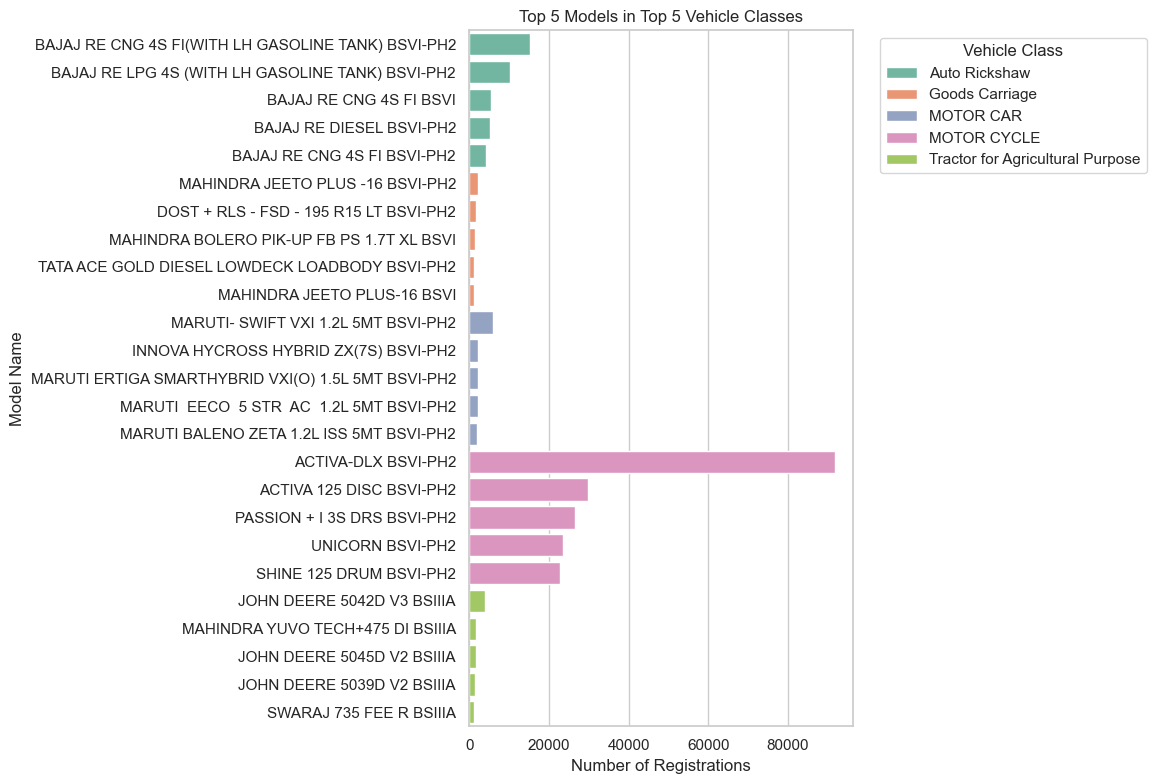

In [59]:
top_classes =df['vehicleClass'].value_counts().head(5).index

filtered_df =df[
    df['vehicleClass'].isin(top_classes) &
    df['modelDesc'].notna()
]

top5_models = (
    filtered_df.groupby(['vehicleClass', 'modelDesc'])
    .size()
    .reset_index(name='count')
    .sort_values(['vehicleClass', 'count'], ascending=[True, False])
    .groupby('vehicleClass')
    .head(5)
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top5_models,
    x='count',
    y='modelDesc',
    hue='vehicleClass',
    dodge=False,
    palette='Set2'
)
plt.title("Top 5 Models in Top 5 Vehicle Classes")
plt.xlabel("Number of Registrations")
plt.ylabel("Model Name")
plt.legend(title="Vehicle Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Top 10 Selling Colors

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_14776\4281670003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colors.values, y=top_colors.index, palette="Paired")


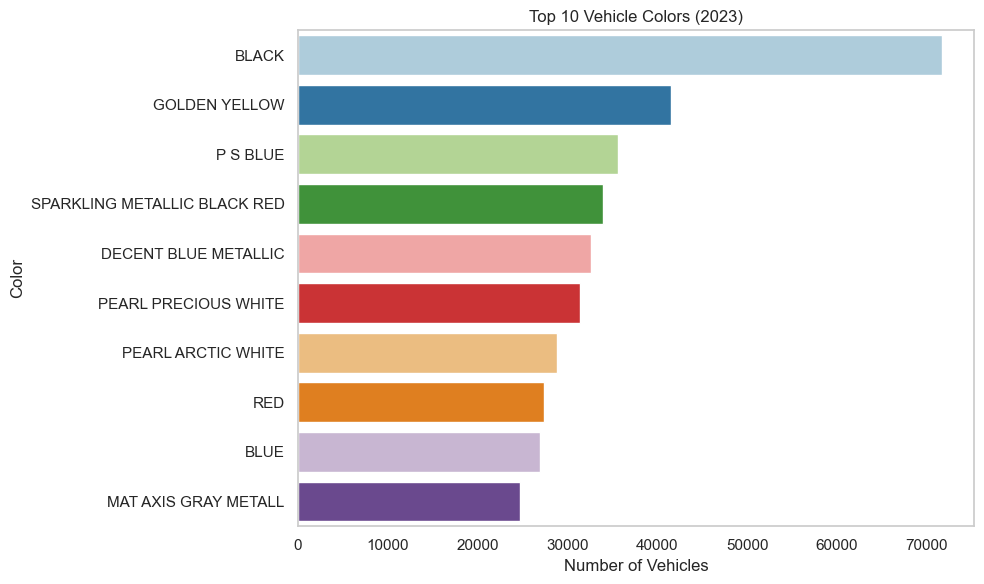

In [84]:
top_colors =df['colour'].dropna().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_colors.values, y=top_colors.index, palette="Paired")
plt.title("Top 10 Vehicle Colors (2023)")
plt.xlabel("Number of Vehicles")
plt.ylabel("Color")
plt.tight_layout()
plt.grid(False)
plt.show()

## Top 5 Vehicle Makers by Total Registrations (2023)

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_14776\871351529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_makers.values, y=top_5_makers.index, palette="Set2")


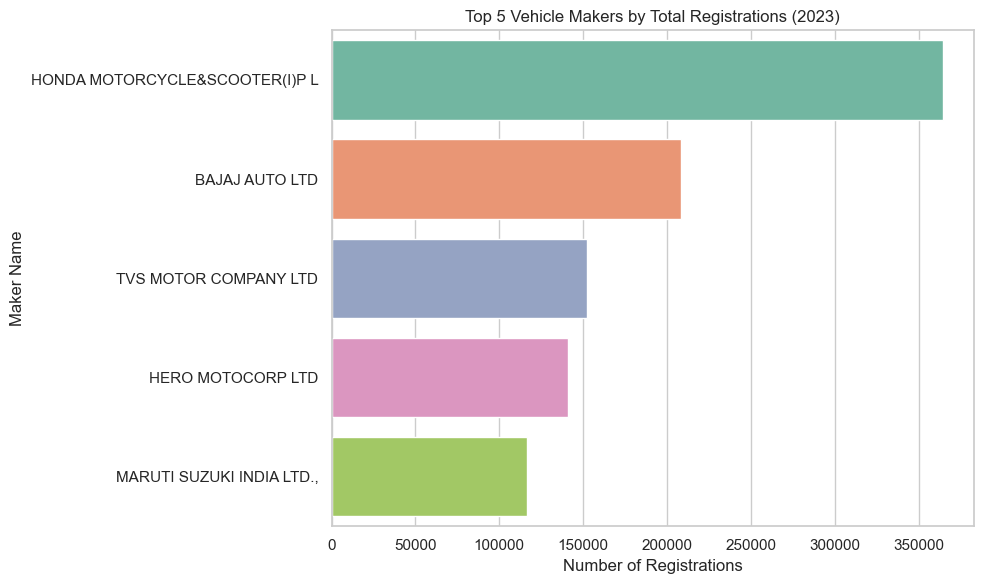

In [90]:
top_5_makers = df['makerName'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_makers.values, y=top_5_makers.index, palette="Set2")
plt.title("Top 5 Vehicle Makers by Total Registrations (2023)")
plt.xlabel("Number of Registrations")
plt.ylabel("Maker Name")
plt.tight_layout()
plt.show()


## Category-Wise Distribution in Top 10 RTO Offices

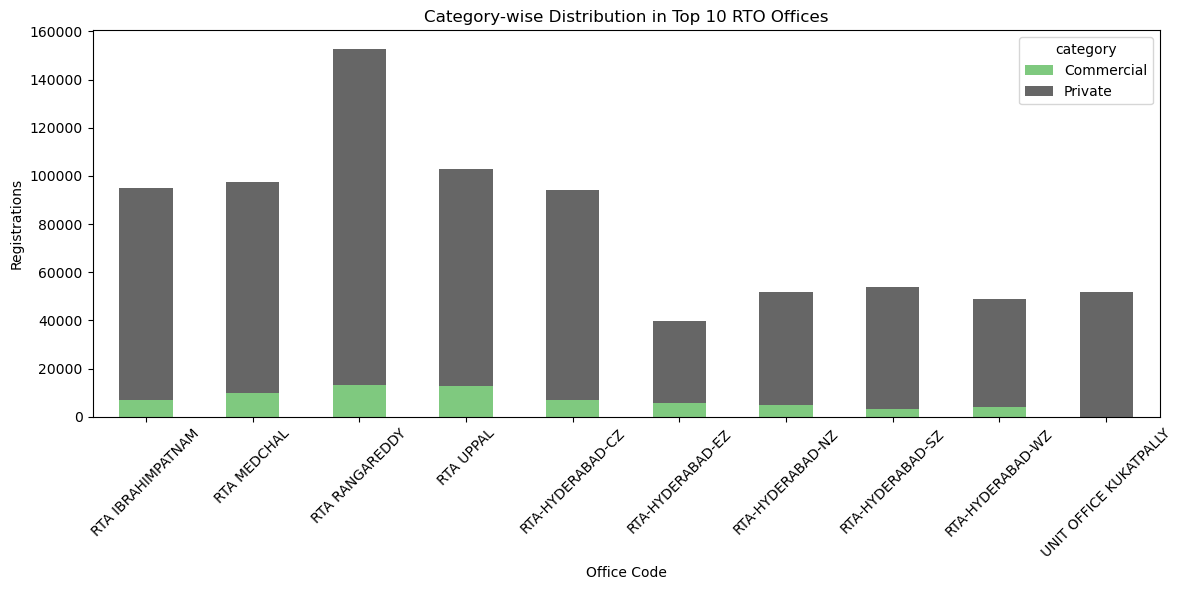

In [7]:
top_offices = df['OfficeCd'].value_counts().head(10).index
office_cat = df[df['OfficeCd'].isin(top_offices)].groupby(['OfficeCd', 'category']).size().unstack(fill_value=0)

office_cat.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title("Category-wise Distribution in Top 10 RTO Offices")
plt.xlabel("Office Code")
plt.ylabel("Registrations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top RTO by Registrations in Each Month (2023)

In [15]:
monthly_rto_counts = df.groupby(['month', 'OfficeCd']).size().reset_index(name='count')
top_rto_per_month = monthly_rto_counts.sort_values(['month', 'count'], ascending=[True, False])
top_rto_per_month = top_rto_per_month.groupby('month').first().reset_index()
print(top_rto_per_month)


      month        OfficeCd  count
0    Jan-23  RTA RANGAREDDY  12570
1    Feb-23  RTA RANGAREDDY   6813
2    Mar-23  RTA RANGAREDDY  16123
3    Apr-23  RTA RANGAREDDY  12415
4    May-23  RTA RANGAREDDY  15125
5    Jun-23  RTA RANGAREDDY  16024
6   July-23  RTA RANGAREDDY  15173
7    Aug-23  RTA RANGAREDDY  16623
8   Sept-23  RTA RANGAREDDY  15175
9    Oct-23  RTA RANGAREDDY  10531
10   Nov-23  RTA RANGAREDDY   7617
11   Dec-23  RTA RANGAREDDY   8626


C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1484\4038463994.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rto_counts = df.groupby(['month', 'OfficeCd']).size().reset_index(name='count')
C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1484\4038463994.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_rto_per_month = top_rto_per_month.groupby('month').first().reset_index()


## Seasonal Registration Trends by Quarter

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_1484\533552676.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_counts.index, y=quarterly_counts.values, palette='Set2')


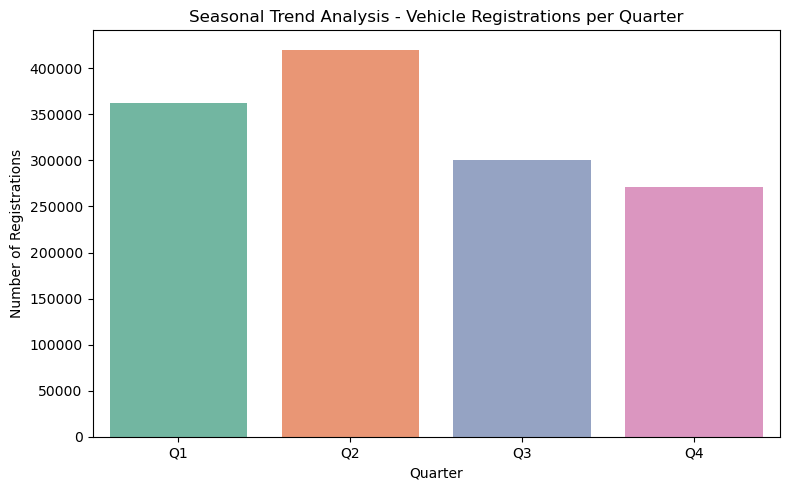

In [21]:
month_to_quarter = {
    'Jan-23': 'Q1', 'Feb-23': 'Q1', 'Mar-23': 'Q1',
    'Apr-23': 'Q2', 'May-23': 'Q2', 'Jun-23': 'Q2',
    'July-23': 'Q3', 'Aug-23': 'Q3', 'Sep-23': 'Q3',
    'Oct-23': 'Q4', 'Nov-23': 'Q4', 'Dec-23': 'Q4'
}
df['quarter'] = df['month'].map(month_to_quarter)
quarterly_counts = df['quarter'].value_counts().reindex(['Q1', 'Q2', 'Q3', 'Q4'])
plt.figure(figsize=(8, 5))
sns.barplot(x=quarterly_counts.index, y=quarterly_counts.values, palette='Set2')
plt.title('Seasonal Trend Analysis - Vehicle Registrations per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Registrations')
plt.tight_layout()
plt.show()